# Keras to Tensorflow Model

In [1]:
import keras
import tensorflow as tf
import coremltools
import numpy as np
np.random.seed(0)
import segmentation_models as sm
import sys
import os
sys.path.append("..")
from seg_net.keras_to_tensorflow import *
from seg_net.data import *


Using TensorFlow backend.
/home/avantariml/.local/lib/python3.5/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


## Set Model Architecture

In [4]:
INPUT_SHAPE = (768,768,3) #(528,528,3)
NUM_CLASS = 1
BACKBONE = 'resnet50'
MODEL_NAME = 'Unet'
LOSS_METRICS = 'BCE_ACC_IOU'
MODEL_PATH = '/media/new_hdd2/seg_net/results/Models/Models'
ACTIVATION = 'sigmoid'

# Output protocol buffer model path
model_name = '{0}/{1}_{2}_{3}_{4}_{5}_{6}'.format(MODEL_PATH,
                                                  BACKBONE,
                                                  MODEL_NAME,
                                                  LOSS_METRICS,
                                                  NUM_CLASS,
                                                  ACTIVATION,
                                                  INPUT_SHAPE[0])
keras_filename = '{}.hdf5'.format(model_name)
pb_filename = '{}.pb'.format(model_name)
mlmodel_filename = '{}.mlmodel'.format(model_name)
pb_opt_filename = '{}_optimized.pb'.format(model_name)
pb_quant_filename = '{}_quantized.pb'.format(model_name)
tflite_filename = '{}.tflite'.format(model_name)

## Build and Load Model

In [3]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet', 
                  classes=NUM_CLASS,
                  activation=ACTIVATION,
                  input_shape = INPUT_SHAPE)

In [4]:
model.load_weights('{}.hdf5'.format(model_name))

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 768, 768, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 768, 768, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 774, 774, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 384, 384, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

## save keras model as tf .pb and as CoreML .mlmodel

In [7]:
[out.op.name for out in model.inputs]

['data']

In [8]:
# output_names
[out.op.name for out in model.outputs]

['sigmoid/Sigmoid']

### Freezing the model to .pb

In [9]:
from keras import backend as K
frozen_graph = freeze_session(K.get_session(),output_names=[out.op.name for out in model.outputs])
tf.train.write_graph(frozen_graph, MODEL_PATH, pb_filename, as_text=False)

INFO:tensorflow:Froze 552 variables.
INFO:tensorflow:Converted 552 variables to const ops.


'/media/new_hdd2/seg_net/results/Models/Models/resnet50_Unet_BCE_ACC_IOU_1_sigmoid_768.pb'

In [23]:
# print all operation names 
#print('\n===== ouptut operation names =====\n')
#for op in sess.graph.get_operations():
#    print(op)   
for names in [n.name for n in tf.get_default_graph().as_graph_def().node]:
    print(names)

data
bn_data/Const
bn_data/beta
bn_data/beta/Assign
bn_data/beta/read
bn_data/Const_1
bn_data/moving_mean
bn_data/moving_mean/Assign
bn_data/moving_mean/read
bn_data/Const_2
bn_data/moving_variance
bn_data/moving_variance/Assign
bn_data/moving_variance/read
bn_data/IsVariableInitialized
bn_data/IsVariableInitialized_1
bn_data/IsVariableInitialized_2
bn_data/init
bn_data/Const_3
bn_data/Const_4
bn_data/Const_5
bn_data/FusedBatchNorm
bn_data/Shape
bn_data/strided_slice/stack
bn_data/strided_slice/stack_1
bn_data/strided_slice/stack_2
bn_data/strided_slice
bn_data/Shape_1
bn_data/strided_slice_1/stack
bn_data/strided_slice_1/stack_1
bn_data/strided_slice_1/stack_2
bn_data/strided_slice_1
bn_data/Shape_2
bn_data/strided_slice_2/stack
bn_data/strided_slice_2/stack_1
bn_data/strided_slice_2/stack_2
bn_data/strided_slice_2
bn_data/Rank/packed
bn_data/Rank
bn_data/range/start
bn_data/range/delta
bn_data/range
bn_data/Prod/input
bn_data/Prod
bn_data/Cast
bn_data/sub/y
bn_data/sub
bn_data/truedi

stage3_unit5_bn3/AssignMovingAvg_1/stage3_unit5_bn3/moving_variance/Pow
stage3_unit5_bn3/AssignMovingAvg_1/stage3_unit5_bn3/moving_variance/sub_2/x
stage3_unit5_bn3/AssignMovingAvg_1/stage3_unit5_bn3/moving_variance/sub_2
stage3_unit5_bn3/AssignMovingAvg_1/stage3_unit5_bn3/moving_variance/truediv
stage3_unit5_bn3/AssignMovingAvg_1/stage3_unit5_bn3/moving_variance/sub_3
stage3_unit5_bn3/AssignMovingAvg_1
stage3_unit5_bn3/cond/Switch
stage3_unit5_bn3/cond/switch_t
stage3_unit5_bn3/cond/switch_f
stage3_unit5_bn3/cond/pred_id
stage3_unit5_bn3/cond/Switch_1
stage3_unit5_bn3/cond/FusedBatchNorm
stage3_unit5_bn3/cond/FusedBatchNorm/Switch
stage3_unit5_bn3/cond/FusedBatchNorm/Switch_1
stage3_unit5_bn3/cond/FusedBatchNorm/Switch_2
stage3_unit5_bn3/cond/FusedBatchNorm/Switch_3
stage3_unit5_bn3/cond/FusedBatchNorm/Switch_4
stage3_unit5_bn3/cond/Merge
stage3_unit5_relu3/Relu
stage3_unit5_conv3/random_uniform/shape
stage3_unit5_conv3/random_uniform/min
stage3_unit5_conv3/random_uniform/max
stage3_u

import/stage2_unit1_bn2/Const_4
import/stage2_unit1_bn2/Const_5
import/stage2_unit1_bn2/FusedBatchNorm
import/stage2_unit1_bn2/moving_mean/biased
import/stage2_unit1_bn2/moving_mean/local_step
import/stage2_unit1_bn2/moving_variance/biased
import/stage2_unit1_bn2/moving_variance/local_step
import/stage2_unit1_bn2/cond/pred_id
import/stage2_unit1_bn2/cond/Switch_1
import/stage2_unit1_bn2/cond/FusedBatchNorm/Switch
import/stage2_unit1_bn2/cond/FusedBatchNorm/Switch_1
import/stage2_unit1_bn2/cond/FusedBatchNorm/Switch_2
import/stage2_unit1_bn2/cond/FusedBatchNorm/Switch_3
import/stage2_unit1_bn2/cond/FusedBatchNorm/Switch_4
import/stage2_unit1_bn2/cond/FusedBatchNorm
import/stage2_unit1_bn2/cond/Merge
import/stage2_unit1_relu2/Relu
import/zero_padding2d_6/Pad/paddings
import/zero_padding2d_6/Pad
import/stage2_unit1_conv2/kernel
import/stage2_unit1_conv2/kernel/read
import/stage2_unit1_conv2/convolution
import/stage2_unit1_bn3/gamma
import/stage2_unit1_bn3/gamma/read
import/stage2_unit1_bn

In [6]:
# Converting a tf.keras model.
converter = tf.lite.TFLiteConverter.from_keras_model_file(os.path.join(MODEL_PATH,keras_filename))
tflite_model = converter.convert()
with open(os.path.join(MODEL_PATH,tflite_filename), "wb") as f:
    f.write(tflite_model)

AttributeError: module 'tensorflow' has no attribute 'lite'

### Optimizing frozen graph for inference

In [16]:
from tensorflow.python.tools import optimize_for_inference_lib

inputGraph = tf.GraphDef()

with tf.gfile.Open(os.path.join(MODEL_PATH, pb_filename), "rb") as f:
    data2read = f.read()
    inputGraph.ParseFromString(data2read)
    
# fix nodes
for node in inputGraph.node:
    if node.op == 'RefSwitch':
        node.op = 'Switch'
        for index in xrange(len(node.input)):
            if 'moving_' in node.input[index]:
                node.input[index] = node.input[index] + '/read'
    elif node.op == 'AssignSub':
        node.op = 'Sub'
        if 'use_locking' in node.attr: del node.attr['use_locking']
            
outputGraph = optimize_for_inference_lib.optimize_for_inference(
              inputGraph,
              ["data"], # an array of the input node(s)
              ["sigmoid/Sigmoid"], # an array of output nodes
              tf.float32.as_datatype_enum,
              toco_compatible=True)

# Save the optimized graph'test.pb'
f = tf.gfile.FastGFile(os.path.join(MODEL_PATH, pb_opt_filename), "wb")
f.write(outputGraph.SerializeToString()) 

### Freezing the model to .mlmodel

In [10]:
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names="data",
                                                    image_input_names="data",
                                                    output_names=['sigmoid/Sigmoid'],
                                                    #image_scale=1/255.0
                                                   )

0 : data, <keras.engine.input_layer.InputLayer object at 0x7f80f04d8198>
1 : bn_data, <keras.layers.normalization.BatchNormalization object at 0x7f80f04d83c8>
2 : zero_padding2d_1, <keras.layers.convolutional.ZeroPadding2D object at 0x7f80f04d8550>
3 : conv0, <keras.layers.convolutional.Conv2D object at 0x7f80424691d0>
4 : bn0, <keras.layers.normalization.BatchNormalization object at 0x7f8041c808d0>
5 : relu0, <keras.layers.core.Activation object at 0x7f8041c52d68>
6 : zero_padding2d_2, <keras.layers.convolutional.ZeroPadding2D object at 0x7f80400e2470>
7 : pooling0, <keras.layers.pooling.MaxPooling2D object at 0x7f80400c29b0>
8 : stage1_unit1_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f80400f9f60>
9 : stage1_unit1_relu1, <keras.layers.core.Activation object at 0x7f80380c4cf8>
10 : stage1_unit1_conv1, <keras.layers.convolutional.Conv2D object at 0x7f80380a0f60>
11 : stage1_unit1_bn2, <keras.layers.normalization.BatchNormalization object at 0x7f801c095cc0>
12 : sta

97 : stage3_unit1_sc, <keras.layers.convolutional.Conv2D object at 0x7f7fd28170f0>
98 : add_8, <keras.layers.merge.Add object at 0x7f7fd24dccc0>
99 : stage3_unit2_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f7fd24dc400>
100 : stage3_unit2_relu1, <keras.layers.core.Activation object at 0x7f7fd24514e0>
101 : stage3_unit2_conv1, <keras.layers.convolutional.Conv2D object at 0x7f7fd2474c88>
102 : stage3_unit2_bn2, <keras.layers.normalization.BatchNormalization object at 0x7f7fd2429f60>
103 : stage3_unit2_relu2, <keras.layers.core.Activation object at 0x7f7fd22d5048>
104 : zero_padding2d_11, <keras.layers.convolutional.ZeroPadding2D object at 0x7f7fd2245400>
105 : stage3_unit2_conv2, <keras.layers.convolutional.Conv2D object at 0x7f7fd2245f28>
106 : stage3_unit2_bn3, <keras.layers.normalization.BatchNormalization object at 0x7f7fd21a3710>
107 : stage3_unit2_relu3, <keras.layers.core.Activation object at 0x7f7fd21a3da0>
108 : stage3_unit2_conv3, <keras.layers.convolutiona

193 : decoder_stage0_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f7fb1b60898>
194 : decoder_stage0_relu1, <keras.layers.core.Activation object at 0x7f7fd00d04e0>
195 : decoder_stage0_conv2, <keras.layers.convolutional.Conv2D object at 0x7f7fb1a3eb70>
196 : decoder_stage0_bn2, <keras.layers.normalization.BatchNormalization object at 0x7f7fb1902438>
197 : decoder_stage0_relu2, <keras.layers.core.Activation object at 0x7f7fb172d5f8>
198 : decoder_stage1_upsample, <keras.layers.convolutional.UpSampling2D object at 0x7f7fab2dab38>
199 : concatenate_2, <keras.layers.merge.Concatenate object at 0x7f7fab2dac50>
200 : decoder_stage1_conv1, <keras.layers.convolutional.Conv2D object at 0x7f7faa0d5cc0>
201 : decoder_stage1_bn1, <keras.layers.normalization.BatchNormalization object at 0x7f7faa098518>
202 : decoder_stage1_relu1, <keras.layers.core.Activation object at 0x7f7faa098cf8>
203 : decoder_stage1_conv2, <keras.layers.convolutional.Conv2D object at 0x7f7faa098470>
204 : d

In [11]:
spec = coreml_model.get_spec()
print(spec.description)

input {
  name: "data"
  type {
    imageType {
      width: 768
      height: 768
      colorSpace: RGB
    }
  }
}
output {
  name: "sigmoid/Sigmoid"
  type {
    multiArrayType {
      shape: 1
      shape: 768
      shape: 768
      dataType: DOUBLE
    }
  }
}



In [12]:
coreml_model.save(os.path.join(MODEL_PATH, mlmodel_filename))

## load & inference the model

In [10]:
from tensorflow.python.platform import gfile
sess = tf.Session()

In [17]:
# load model from pb file
#with gfile.FastGFile(os.path.join(MODEL_PATH,pb_filename),'rb') as f:
with gfile.FastGFile(os.path.join(MODEL_PATH,pb_opt_filename),'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    g_in = tf.import_graph_def(graph_def)

ValueError: Input 0 of node import_3/bn_data/FusedBatchNorm was passed int32 from import_3/data:0 incompatible with expected float.

In [15]:
# Load Test Images
import matplotlib.pyplot as plt
%matplotlib inline
import random
import skimage
import glob
import os
import cv2
test_path = "/media/new_hdd2/seg_net/data/raw/test"
fnames = sorted(glob.glob(os.path.join(test_path,"*.jpg")))
images = []
outs = []
for f in fnames:
    img = skimage.io.imread(f)
    images.append(img)

CPU times: user 188 ms, sys: 12 ms, total: 200 ms
Wall time: 114 ms


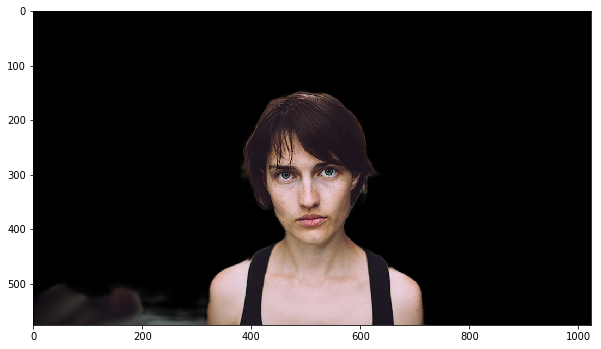

In [21]:
%%time
# Choose a random image and preprocess for inference.
i = random.choice(range(0,len(images)))
img  = images[i]
img_ = np.expand_dims(cv2.resize(img,INPUT_SHAPE[:2]),axis=0)
img_ = preprocess_input(img_, imgNorm="divide")
# inference by the model (op name must comes with :0 to specify the index of its output)
tensor_output = sess.graph.get_tensor_by_name('import/sigmoid/Sigmoid:0')
tensor_input = sess.graph.get_tensor_by_name('import/data:0')
output = sess.run(tensor_output, {tensor_input: img_})
# Resize and Apply Mask on input image.
mask = skimage.transform.resize(np.squeeze(output),img.shape[:2],preserve_range=True)
im = cv2.multiply(np.repeat(np.expand_dims(mask,axis=-1),3,axis=2).astype(float), img.astype(float))/255
plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(im)

In [22]:
sess.close()